In [40]:
from project.dataset import Dataset, MRIDataset
import matplotlib.pyplot as plt

In [41]:
ds = Dataset()
cases = ds.load_skullstripped_mri(cohort_num=1)
masks = ds.load_cmb_masks(cohort_num=1)

In [42]:
normal_img_dataset = MRIDataset(cases=cases, masks=masks)

smaller_img_dataset = MRIDataset(cases=cases, masks=masks, target_size=(50, 50))

larger_img_dataset = MRIDataset(cases=cases, masks=masks, target_size=(512, 512))

In [43]:
s_mri, _, _, _, = smaller_img_dataset[0]
n_mri, _, _, _, = normal_img_dataset[0]
l_mri, _, _, _, = larger_img_dataset[0]

In [44]:
def plot_diff_size_slices(small, normal, large):
    fig, axes = plt.subplots(1, 3)
    
    s_mri_slice = small[23].squeeze().cpu().numpy() 
    axes[0].imshow(s_mri_slice, cmap='gray')
    axes[0].set_title(f'Slice 22 - (50x50)')
    axes[0].axis('off')
    
    n_mri_slice = normal[23].squeeze().cpu().numpy() 
    axes[1].imshow(n_mri_slice, cmap='gray')
    axes[1].set_title(f'Slice 22 - (256x256)')
    axes[1].axis('off')
    
    l_mri_slice = large[23].squeeze().cpu().numpy() 
    axes[2].imshow(l_mri_slice, cmap='gray')
    axes[2].set_title(f'Slice 22 - (512x512)')
    axes[2].axis('off')
    

    plt.tight_layout()
    plt.show()

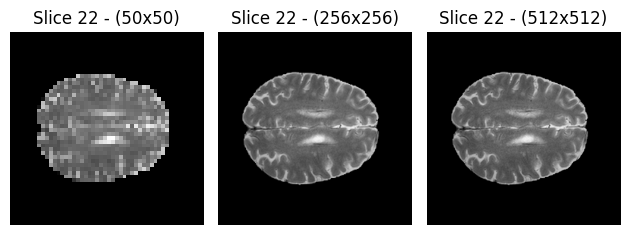

In [45]:
plot_diff_size_slices(s_mri, n_mri, l_mri)